In [1]:
from src.data.create_dataset import *
from src.models import models

In [ ]:
## Preprocess (load data -> clean data -> save preprocessed data to cloud)
!python../ main / preprocess.py

In [ ]:
## Generate the features (generate features -> save the new dataframe with features to cloud)
!python../ main / feature_engineering.py

In [ ]:
## train the model (train the model -> save the model to cloud)
!python../ main / train_model.py

In [2]:
## e.g. load final dataframes from cloud (month 1 is for training, month 2 is for testing)
train_df = get_output_data('data/features/2022_01')
test_df = get_output_data('data/features/2022_02')

Current version: 20220507-183627
Current version: 20220507-183643


In [3]:
train_df.head(5)

,trip_duration,trip_speed,trip_tolls,pickup_weekday,pickup_hour,pickup_minute,work_hours,meter_eng,meter_dis,total_tip,total_fare,tip_percentage,big_tip,tpep_pickup_datetime,tpep_dropoff_datetime
0,85183.0,0.000184,0.0,1,0,44,False,138,38,28.61,141.0,20.290780,False,2022-01-04 00:44:43,2022-01-05 00:24:26
1,5477.0,0.000026,0.0,1,22,43,False,132,161,12.85,63.0,20.396825,False,2022-01-04 22:43:04,2022-01-05 00:14:21
2,83457.0,0.000012,0.0,1,3,20,False,48,264,0.00,5.5,0.000000,False,2022-01-04 03:20:48,2022-01-05 02:31:45
3,85516.0,0.000052,0.0,1,3,13,False,48,41,0.00,15.0,0.000000,False,2022-01-04 03:13:33,2022-01-05 02:58:49
4,67491.0,0.000029,0.0,1,5,15,False,170,140,0.00,8.0,0.000000,False,2022-01-04 05:15:09,2022-01-05 00:00:00


In [4]:
## Choose the features and the label
label = 'big_tip'
features = list(train_df.columns.drop([label, 'tpep_pickup_datetime', 'tpep_dropoff_datetime']))

In [5]:
## Initialize the model
model = models.GaussianNBModel(features=features, label=label)

In [6]:
## Split the data into train and test
x_train, y_train = model.preprocess(train_df)
x_test, y_test = model.preprocess(test_df)

In [7]:
## Fit the model
history = model.fit(x_train, y_train)

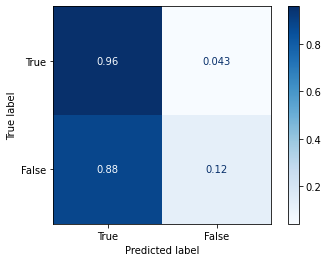

In [8]:
## Plot the confusion matrix (normalized
model.plot_confusion_matrix(x_test, y_test, normalize='true')

In [ ]:
## 10-Fold Cross-validation on the testing data
model.cross_validate(x_test, y_test)